# 04 - Linear Regression - Data Cleaning

## Table of Contents
01. Import Libraries + Data
02. Data Cleaning
    - Missing values
    - Duplicates check
    - Extreme values check

## 1. Import Libraries + Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# import data path
path = r'/Users/alliecarlisle/Desktop/CareerFoundry_Data_Analytics/Craft_Beer_Sales_Analysis'

In [3]:
# import merged clean csv
df_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merge_dt_clean.pkl'))

In [4]:
# display all columns
pd.options.display.max_columns = None

In [5]:
df_merge.head(4)

,product_code,vendor,name,retail_price,product_unit,vendor_country,size,abv,full_date,year,month,day_of_month,day_of_week,time,units_sold,revenue,discount,profit,percent_markup,percent_discount,_merge,abv_category,month_no,weekday_no
0,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-03,2022,Jul,3,Sunday,0,2.0,420.00,180.00,140.00,50.00,30.00,both,low abv,7,6
1,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-09,2022,Jul,9,Saturday,13,4.0,960.00,240.00,400.00,71.43,20.00,both,low abv,7,5
2,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-19,2022,Jul,19,Tuesday,20,5.0,1440.00,60.00,740.00,105.71,4.00,both,low abv,7,1
3,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-03-20,2022,Mar,20,Sunday,17,4.0,412.23,277.77,52.23,14.51,40.26,both,low abv,3,6


## 2. Data Cleaning

### Missing Values

In [6]:
df_merge.isnull().sum()

product_code            0
vendor                  0
name                    0
retail_price            0
product_unit            0
vendor_country          0
size                 5833
abv                  5847
full_date               0
year                    0
month                   0
day_of_month            0
day_of_week             0
time                    0
units_sold              0
revenue                 0
discount            10202
profit                  0
percent_markup          0
percent_discount    10202
_merge                  0
abv_category            0
month_no                0
weekday_no              0
dtype: int64

In [7]:
nan_rows = df_merge[df_merge['size'].isna()].head(100)
print(nan_rows)

     product_code vendor                         name  retail_price  \
131          1767    nan      8 Barrels in assortment         480.0   
132          1767    nan      8 Barrels in assortment         480.0   
133          1767    nan      8 Barrels in assortment         480.0   
134          1767    nan      8 Barrels in assortment         480.0   
3243         2747    nan           Americano lemonade         450.0   
...           ...    ...                          ...           ...   
3889          965    nan  Assam Tea / Milk Oolong Tea         250.0   
3890          965    nan  Assam Tea / Milk Oolong Tea         250.0   
3891          965    nan  Assam Tea / Milk Oolong Tea         250.0   
3892          965    nan  Assam Tea / Milk Oolong Tea         250.0   
3893          965    nan  Assam Tea / Milk Oolong Tea         250.0   

     product_unit vendor_country  size  abv  full_date  year month  \
131        Pieces            nan   NaN  NaN 2020-02-14  2020   Feb   
132    

In [8]:
# display 100 rows
pd.options.display.max_rows = 100

In [9]:
# drop NaNs from size column, these are products other than beer like lemonade or tea

df_clean = df_merge.dropna(subset=['size'])
df_clean.head(100)

,product_code,vendor,name,retail_price,product_unit,vendor_country,size,abv,full_date,year,month,day_of_month,day_of_week,time,units_sold,revenue,discount,profit,percent_markup,percent_discount,_merge,abv_category,month_no,weekday_no
0,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-03,2022,Jul,3,Sunday,0,2.00,420.00,180.00,140.00,50.00,30.00,both,low abv,7,6
1,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-09,2022,Jul,9,Saturday,13,4.00,960.00,240.00,400.00,71.43,20.00,both,low abv,7,5
2,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-19,2022,Jul,19,Tuesday,20,5.00,1440.00,60.00,740.00,105.71,4.00,both,low abv,7,1
3,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-03-20,2022,Mar,20,Sunday,17,4.00,412.23,277.77,52.23,14.51,40.26,both,low abv,3,6
4,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-03-23,2022,Mar,23,Wednesday,17,2.00,360.00,40.00,180.00,100.00,10.00,both,low abv,3,2
5,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-03-27,2022,Mar,27,Sunday,17,2.00,319.73,80.27,139.73,77.63,20.07,both,low abv,3,6
6,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-05-06,2022,May,6,Friday,0,2.00,316.66,83.34,136.66,75.92,20.84,both,low abv,5,4
7,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-05-09,2022,May,9,Monday,19,1.00,159.71,40.29,69.71,77.46,20.15,both,low abv,5,0
8,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-05-21,2022,May,21,Saturday,18,2.00,320.00,80.00,140.00,77.78,20.00,both,low abv,5,5
9,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-05-26,2022,May,26,Thursday,18,1.00,160.00,40.00,70.00,77.78,20.00,both,low abv,5,3


In [10]:
# check

df_clean.isnull().sum()

product_code           0
vendor                 0
name                   0
retail_price           0
product_unit           0
vendor_country         0
size                   0
abv                   25
full_date              0
year                   0
month                  0
day_of_month           0
day_of_week            0
time                   0
units_sold             0
revenue                0
discount            8788
profit                 0
percent_markup         0
percent_discount    8788
_merge                 0
abv_category           0
month_no               0
weekday_no             0
dtype: int64

In [11]:
df_clean.shape

(44248, 24)

In [12]:
# explore NaNs in abv column

nan_abv_rows = df_clean[df_clean['abv'].isna()]
print(nan_abv_rows)

      product_code     vendor                                            name  \
16619         4230  Cool Brew                       Cool Brew Cappuccino 0.25   
16620         4230  Cool Brew                       Cool Brew Cappuccino 0.25   
16621         4232  Cool Brew                     Cool Brew Matcha Latte 0.25   
16622         4232  Cool Brew                     Cool Brew Matcha Latte 0.25   
16623         4232  Cool Brew                     Cool Brew Matcha Latte 0.25   
16624         4229  Cool Brew  Cool Brew Black coffee with passion fruit 0.25   
16625         4229  Cool Brew  Cool Brew Black coffee with passion fruit 0.25   
16626         4229  Cool Brew  Cool Brew Black coffee with passion fruit 0.25   
16627         4229  Cool Brew  Cool Brew Black coffee with passion fruit 0.25   
16628         4231  Cool Brew                   Cool Brew Espresso Tonic 0.25   
16629         4231  Cool Brew                   Cool Brew Espresso Tonic 0.25   
47827         2294    XP Bre

In [13]:
# remove NaN abvs from df_clean - these show coffee products, I just want to see beer

df_clean = df_clean.dropna(subset=['abv'])
df_clean.head()

,product_code,vendor,name,retail_price,product_unit,vendor_country,size,abv,full_date,year,month,day_of_month,day_of_week,time,units_sold,revenue,discount,profit,percent_markup,percent_discount,_merge,abv_category,month_no,weekday_no
0,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-03,2022,Jul,3,Sunday,0,2.0,420.00,180.00,140.00,50.00,30.00,both,low abv,7,6
1,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-09,2022,Jul,9,Saturday,13,4.0,960.00,240.00,400.00,71.43,20.00,both,low abv,7,5
2,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-19,2022,Jul,19,Tuesday,20,5.0,1440.00,60.00,740.00,105.71,4.00,both,low abv,7,1
3,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-03-20,2022,Mar,20,Sunday,17,4.0,412.23,277.77,52.23,14.51,40.26,both,low abv,3,6
4,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-03-23,2022,Mar,23,Wednesday,17,2.0,360.00,40.00,180.00,100.00,10.00,both,low abv,3,2


In [14]:
df_clean.isnull().sum()

product_code           0
vendor                 0
name                   0
retail_price           0
product_unit           0
vendor_country         0
size                   0
abv                    0
full_date              0
year                   0
month                  0
day_of_month           0
day_of_week            0
time                   0
units_sold             0
revenue                0
discount            8784
profit                 0
percent_markup         0
percent_discount    8784
_merge                 0
abv_category           0
month_no               0
weekday_no             0
dtype: int64

In [15]:
# explore NaNs in discount column

nan_discount_rows = df_clean[df_clean['discount'].isna()]
print(nan_discount_rows)

      product_code vendor                                       name  \
28            4301    nan    18th Street Brewery Sex and Candy 0.473   
31            4301    nan    18th Street Brewery Sex and Candy 0.473   
36            4303    nan      18th Street Brewery Under Crown 0.473   
39            4738    nan  2nd Shift Brewing Arancia e Ibisco Barrel   
45            4738    nan  2nd Shift Brewing Arancia e Ibisco Barrel   
...            ...    ...                                        ...   
49950         4639    nan                      Petr Petrovich Barrel   
50032         2166    nan                             Roug 6 Hop IPA   
50055         4318    nan     Rocheste Millz Milkshejk AjPiEj Barrel   
50060         1534    nan                               Rojal Porter   
50074         1861    nan        Stoun Imperial Rashn Stout Barrel l   

       retail_price product_unit vendor_country   size    abv  full_date  \
28            480.0       Pieces            USA  0.473   7.

### Duplicates check

In [16]:
dups = df_clean.duplicated()

In [17]:
dups.shape # clean

(44223,)

### Extreme values check

In [18]:
df_clean['profit'].mean()

702.611212943491

In [19]:
df_clean['profit'].median()

273.65

In [20]:
df_clean['profit'].max()

33352.46

/var/folders/w0/qzmf_lf542x0x6lpcdj7lnww0000gn/T/ipykernel_5039/4096384803.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['profit'], bins=25) # Shows extreme values


<Axes: xlabel='profit', ylabel='Density'>

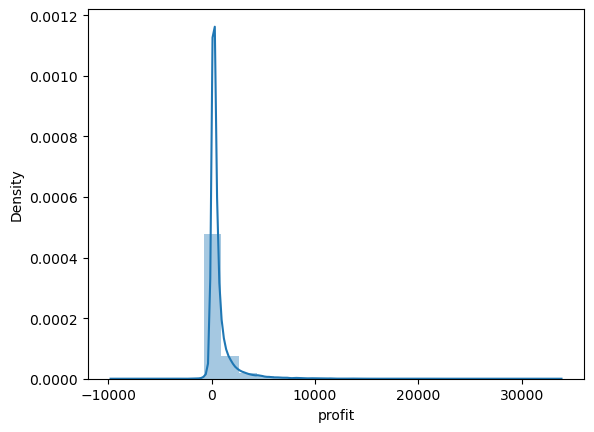

In [21]:
sns.distplot(df_clean['profit'], bins=25) # Shows extreme values

In [22]:
mask = df_clean['profit'] < -500

In [23]:
negative_profits = df_clean[mask]

In [24]:
negative_profits.shape

(199, 24)

In [25]:
df_clean.shape

(44223, 24)

In [26]:
# drop the 199 rows with profits less than -500

df_clean = df_clean[~mask]

In [27]:
df_clean['profit'].mean()

710.3017195166274

In [28]:
df_clean['profit'].median()

276.195

In [29]:
df_clean['profit'].max()

33352.46

In [30]:
# check for outliers past 9000

mask_2 = df_clean['profit'] > 9000

In [31]:
extreme_profits = df_clean[mask_2]

In [32]:
extreme_profits.shape

(213, 24)

In [33]:
# drop the 213 rows with profits more than 9000

df_clean = df_clean[~mask_2]

In [34]:
df_clean.shape

(43811, 24)

In [35]:
df_clean['profit'].mean()

653.7031807080415

In [36]:
df_clean['profit'].median()

273.5

In [37]:
df_clean['profit'].max()

8998.89

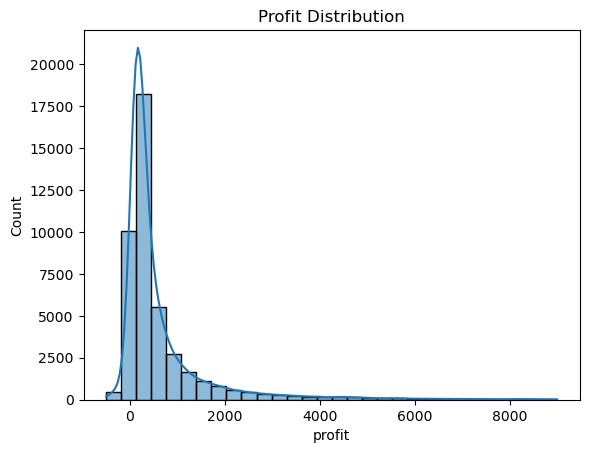

In [38]:
# show new profit distribution

hist = sns.histplot(df_clean['profit'], bins = 30, kde = True)
plt.title('Profit Distribution')
plt.show()

In [39]:
# save hist

hist.figure.savefig("profit_dist.png")

### notes - removed extreme values that made up 0.5% of the data for below 0 and above 9000 in the profit column.

### histogram is right skewed

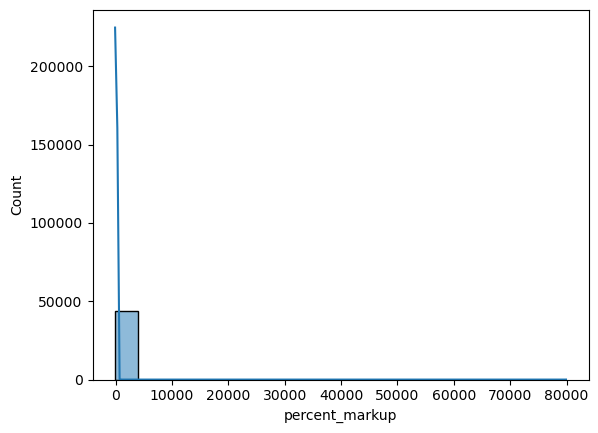

In [40]:
# see how profit compares to percent_markup distribution

hist_2 = sns.histplot(df_clean['percent_markup'], bins = 20, kde = True)

In [41]:
markup_ext = df_clean[df_clean['percent_markup'] > 250]

In [42]:
markup_ext

,product_code,vendor,name,retail_price,product_unit,vendor_country,size,abv,full_date,year,month,day_of_month,day_of_week,time,units_sold,revenue,discount,profit,percent_markup,percent_discount,_merge,abv_category,month_no,weekday_no
5559,5201,Bakunin,Bakunin Ruka Boga Barrel,560.0,Liters,Russia,1.00,4.5,2022-08-28,2022,Aug,28,Sunday,15,6.00,3181.03,178.97,3121.03,5201.72,5.33,both,low abv,8,6
5853,3514,Big Village,Big Village ABC Pils Barrel,560.0,Liters,Russia,1.00,5.5,2021-05-05,2021,May,5,Wednesday,15,5.50,2936.18,143.82,2111.18,255.90,4.67,both,regular abv,5,2
6283,2198,Big Village,Big Village Phantasmagoria / Quintessence of S...,300.0,Pieces,Russia,0.50,6.5,2021-12-28,2021,Dec,28,Tuesday,19,2.00,900.00,100.00,650.00,260.00,10.00,both,regular abv,12,1
11515,2225,Bullevie,Bullevie Sidra Vivizero / 0.5,300.0,Pieces,Russia,0.50,5.5,2020-07-09,2020,Jul,9,Thursday,19,3.00,1500.00,NaN,1095.00,270.37,NaN,both,regular abv,7,3
14064,1790,nan,Cider dry Barkaiztegi 0.75,750.0,Pieces,nan,0.75,6.0,2022-07-03,2022,Jul,3,Sunday,0,1.00,490.00,210.00,489.00,48900.00,30.00,both,regular abv,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42178,3453,TATA Brew,TATA x NS - Narcissist 0.33,300.0,Pieces,USA,0.33,5.2,2021-07-05,2021,Jul,5,Monday,17,3.00,900.00,NaN,660.00,275.00,NaN,both,regular abv,7,0
42179,3453,TATA Brew,TATA x NS - Narcissist 0.33,300.0,Pieces,USA,0.33,5.2,2021-07-10,2021,Jul,10,Saturday,0,3.00,870.00,30.00,630.00,262.50,3.33,both,regular abv,7,5
42180,3453,TATA Brew,TATA x NS - Narcissist 0.33,300.0,Pieces,USA,0.33,5.2,2021-07-13,2021,Jul,13,Tuesday,2,1.00,300.00,NaN,220.00,275.00,NaN,both,regular abv,7,1
42183,3453,TATA Brew,TATA x NS - Narcissist 0.33,300.0,Pieces,USA,0.33,5.2,2021-07-27,2021,Jul,27,Tuesday,14,11.00,3240.00,60.00,2360.00,268.18,1.82,both,regular abv,7,1


In [43]:
markup_ext.shape

(108, 24)

In [44]:
df_clean.shape

(43811, 24)

In [45]:
# check for outliers past 250

mask_3 = df_clean['percent_markup'] > 250

In [46]:
extreme_markups = df_clean[mask_3]

In [47]:
extreme_markups.shape

(108, 24)

In [48]:
# drop the 108 rows with profits more than 9000

df_clean = df_clean[~mask_3]

In [49]:
df_clean.shape

(43703, 24)

In [50]:
43811 - 43703

108

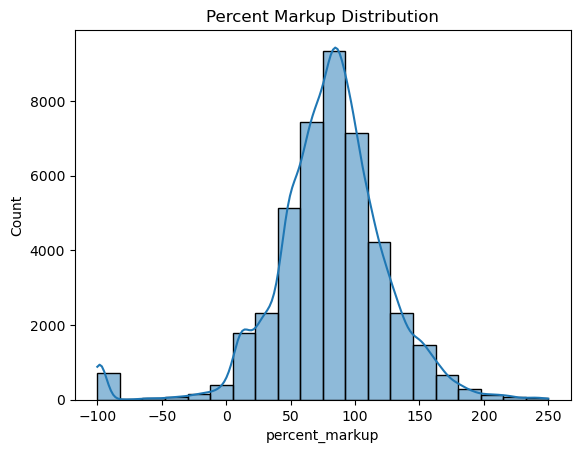

In [51]:
# re-do this: see how profit compares to percent_markup distribution

hist_2 = sns.histplot(df_clean['percent_markup'], bins = 20, kde = True)
plt.title('Percent Markup Distribution')
plt.show()

In [52]:
# save hist_2

hist_2.figure.savefig("percent_markup_dist.png")

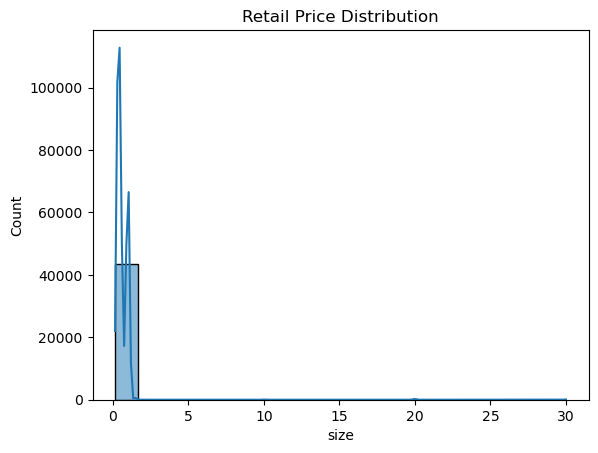

In [53]:
hist_3 = sns.histplot(df_clean['size'], bins = 20, kde = True)
plt.title('Retail Price Distribution')
plt.show()

In [54]:
# check outliers in size column

mask_4 = df_clean['size'] > 2.5

In [55]:
extreme_size = df_clean[mask_4]

In [56]:
extreme_size.shape

(69, 24)

In [57]:
extreme_size

,product_code,vendor,name,retail_price,product_unit,vendor_country,size,abv,full_date,year,month,day_of_month,day_of_week,time,units_sold,revenue,discount,profit,percent_markup,percent_discount,_merge,abv_category,month_no,weekday_no
3128,1842,Alvinne,Alvinne Kjuve Freddi/Cuvee Freddy OA Barrel,1280.0,Liters,Belgium,20.0,8.0,2020-03-17,2020,Mar,17,Tuesday,18,0.750,875.00,85.00,316.25,56.60,8.85,both,high abv,3,1
3129,1842,Alvinne,Alvinne Kjuve Freddi/Cuvee Freddy OA Barrel,1280.0,Liters,Belgium,20.0,8.0,2020-03-18,2020,Mar,18,Wednesday,15,2.750,3032.82,487.18,984.07,48.03,13.84,both,high abv,3,2
3130,1842,Alvinne,Alvinne Kjuve Freddi/Cuvee Freddy OA Barrel,1280.0,Liters,Belgium,20.0,8.0,2020-03-19,2020,Mar,19,Thursday,17,1.750,1630.00,610.00,326.25,25.02,27.23,both,high abv,3,3
3131,1842,Alvinne,Alvinne Kjuve Freddi/Cuvee Freddy OA Barrel,1280.0,Liters,Belgium,20.0,8.0,2020-03-20,2020,Mar,20,Friday,15,0.875,1018.89,101.11,367.02,56.30,9.03,both,high abv,3,4
3132,1842,Alvinne,Alvinne Kjuve Freddi/Cuvee Freddy OA Barrel,1280.0,Liters,Belgium,20.0,8.0,2020-03-22,2020,Mar,22,Sunday,18,2.750,3186.59,333.41,1137.84,55.54,9.47,both,high abv,3,6
3133,1842,Alvinne,Alvinne Kjuve Freddi/Cuvee Freddy OA Barrel,1280.0,Liters,Belgium,20.0,8.0,2020-03-24,2020,Mar,24,Tuesday,15,3.000,3570.00,270.00,1335.00,59.73,7.03,both,high abv,3,1
3134,1842,Alvinne,Alvinne Kjuve Freddi/Cuvee Freddy OA Barrel,1280.0,Liters,Belgium,20.0,8.0,2020-03-26,2020,Mar,26,Thursday,17,1.750,2005.38,234.62,701.63,53.82,10.47,both,high abv,3,3
3135,1843,Alvinne,Alvinne Fi/Phi Barrel,1120.0,Liters,Belgium,20.0,8.0,2020-03-08,2020,Mar,8,Sunday,18,1.000,905.42,214.58,317.42,53.98,19.16,both,high abv,3,6
3136,1843,Alvinne,Alvinne Fi/Phi Barrel,1120.0,Liters,Belgium,20.0,8.0,2020-03-09,2020,Mar,9,Monday,17,3.000,2495.65,864.35,731.65,41.48,25.72,both,high abv,3,0
3137,1843,Alvinne,Alvinne Fi/Phi Barrel,1120.0,Liters,Belgium,20.0,8.0,2020-03-10,2020,Mar,10,Tuesday,15,2.750,2723.46,356.54,1106.46,68.43,11.58,both,high abv,3,1


In [58]:
df_clean.shape

(43703, 24)

In [59]:
# drop the 69 rows with outlier values in size column - I'm excluding the barrels of beer from my analysis

df_clean = df_clean[~mask_4]

In [60]:
# check

df_clean.shape

(43634, 24)

In [61]:
# check

43703 - 43634

69

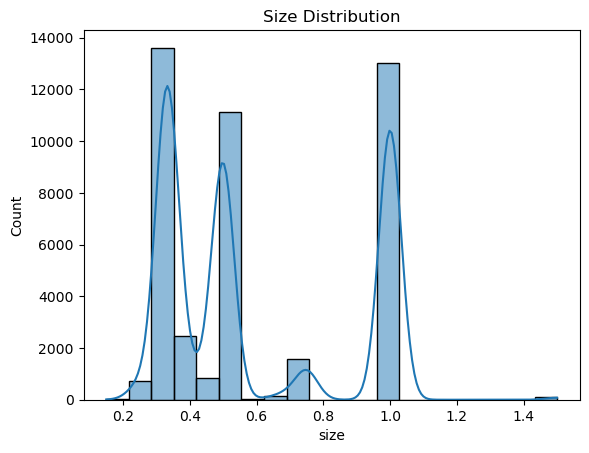

In [62]:
# re-do: check size distribution

hist_3 = sns.histplot(df_clean['size'], bins = 20, kde = True)
plt.title('Size Distribution')
plt.show()

In [63]:
# check year distribution

df_clean['year'].value_counts()

2020    23185
2021    13905
2022     6544
Name: year, dtype: int64

### notes - I may need to make up some normalization here if I use a year to year comparison of profits as about 50% of the transactions come from 2020 and about 30% come from 2021 and 15% come from 2022. We do not have the same number of transactions per year

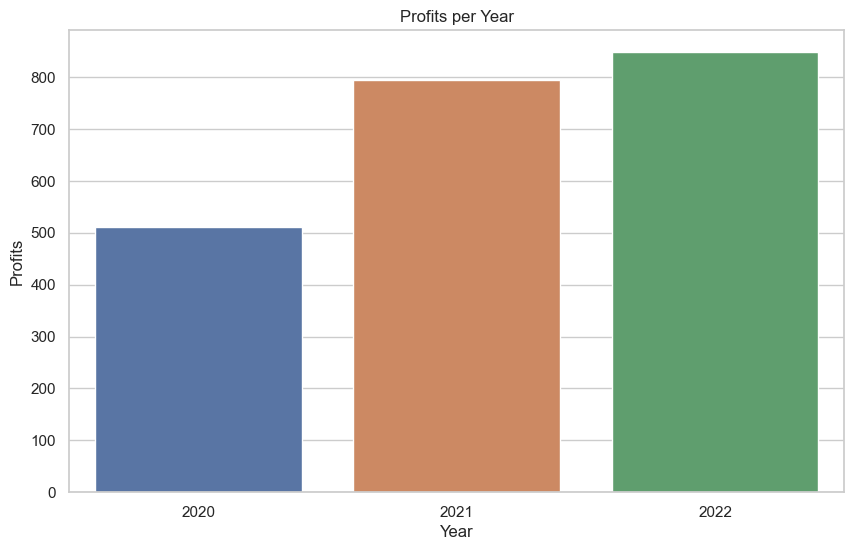

In [64]:
# create a bar chart to see sum of profits per year

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

sns.barplot(x='year', y='profit', data=df_clean, errorbar=None)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Profits')
plt.title('Profits per Year')

# Show the plot
plt.show()

### notes - so what is going on here? There are more transactions during 2020 but that has the lowest profit?

In [65]:
year = 2020
df_2020 = df_clean[df_clean['year'] == 2020]

# Calculate total profits for the year 2020
total_profits_2020 = df_2020['profit'].sum()

In [66]:
total_profits_2020

11831943.5

In [67]:
year = 2021
df_2021 = df_clean[df_clean['year'] == 2021]

# Calculate total profits for the year 2021
total_profits_2021 = df_2021['profit'].sum()

In [68]:
total_profits_2021

11034677.79

In [69]:
year = 2022
df_2022 = df_clean[df_clean['year'] == 2022]

# Calculate total profits for the year 2021
total_profits_2022 = df_2022['profit'].sum()

In [70]:
total_profits_2022

5548562.42

### notes - so why does my bar graph look like that? I'll double check that.

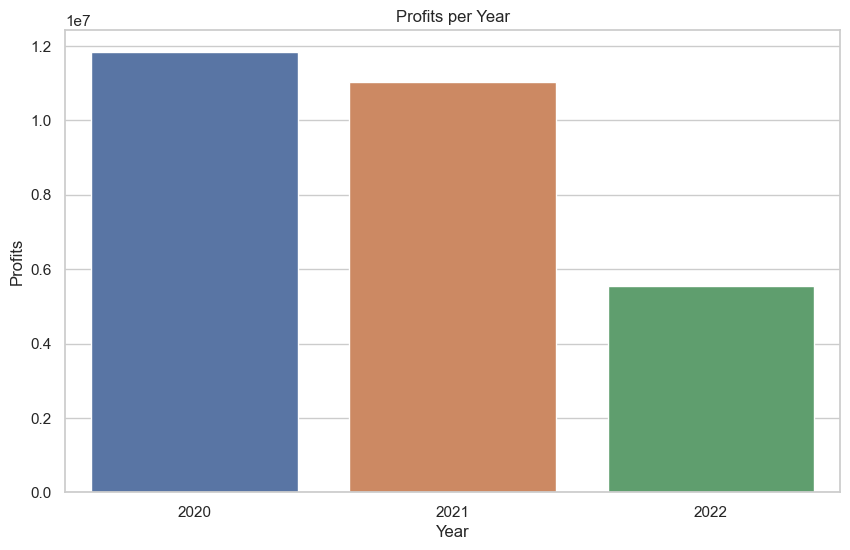

In [71]:
# create a bar chart to see sum of profits per year

# Group by year and calculate the sum of profits
profits_per_year = df_clean.groupby('year')['profit'].sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

profits_year_bar = sns.barplot(x='year', y='profit', data=profits_per_year, errorbar=None)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Profits')
plt.title('Profits per Year')

# Show the plot
plt.show()


### notes - fixed my issue from above - needed to sum the profits first. 

In [72]:
# save bar chart

profits_year_bar.figure.savefig("profits_year_bar.png")

In [73]:
# check to see how many months worth of data we have for 2022

year_to_check = 2022
df_clean_2022 = df_clean[df_clean['year'] == year_to_check]

month_value_counts = df_clean_2022['month_no'].value_counts()

month_value_counts

1    1429
8     985
3     938
2     866
7     679
9     456
5     448
6     401
4     342
Name: month_no, dtype: int64

### I can see that for 2022, we don't have data for October, November, and December (Q4). I'll have to think about what to do with this information

### Maybe do a forecast for Q4?

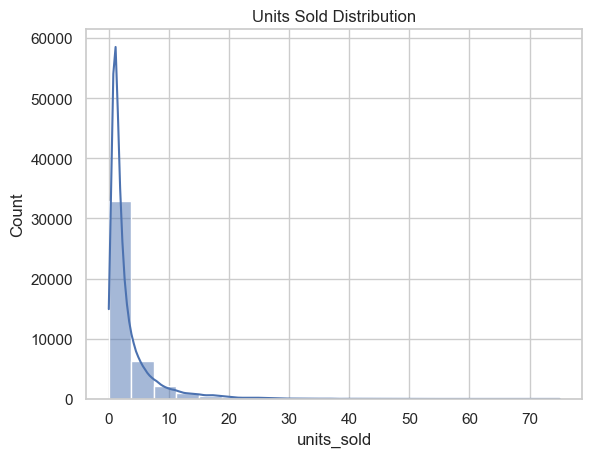

In [74]:
# check for outliers in units_sold

hist_4 = sns.histplot(df_clean['units_sold'], bins = 20, kde = True)
plt.title('Units Sold Distribution')
plt.show()

In [75]:
# check for # of outliers

mask_5 = df_clean['units_sold'] > 30

In [76]:
extreme_units_sold = df_clean[mask_5]

In [77]:
extreme_units_sold.shape

(147, 24)

In [78]:
extreme_units_sold

,product_code,vendor,name,retail_price,product_unit,vendor_country,size,abv,full_date,year,month,day_of_month,day_of_week,time,units_sold,revenue,discount,profit,percent_markup,percent_discount,_merge,abv_category,month_no,weekday_no
902,2485,AF Brew,"AF Brew Bus 0,5",280.0,Pieces,Russia,0.50,4.5,2022-07-31,2022,Jul,31,Sunday,0,35.00,9189.78,610.22,4289.78,87.55,6.23,both,low abv,7,6
2037,2341,AF Brew,"AF Brew Oodles Of LabraDoodles 6,7% 0,5",350.0,Pieces,Russia,0.50,6.7,2022-07-31,2022,Jul,31,Sunday,0,38.00,11804.52,1495.48,5154.52,77.51,11.24,both,regular abv,7,6
2041,4085,AF Brew,AF Brew Out Of The Box,640.0,Liters,Russia,1.00,8.0,2021-08-31,2021,Aug,31,Tuesday,17,30.75,18208.23,1471.77,8368.23,85.04,7.48,both,high abv,8,1
2495,5027,AF Brew,AF Brew Tram 0.5,300.0,Pieces,Russia,0.50,4.5,2022-07-09,2022,Jul,9,Saturday,13,32.00,8488.03,1111.97,4008.03,89.46,11.58,both,low abv,7,5
2675,3936,AF Brew,AF Brew Its Over 9000! 3.0 0.33,300.0,Pieces,Russia,0.33,7.0,2022-07-09,2022,Jul,9,Saturday,13,32.00,8103.18,1416.82,3623.18,80.87,14.88,both,regular abv,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48459,4976,Zagovor,Zagovor Midday Moscow 0.5,350.0,Pieces,Russia,0.50,4.7,2022-06-13,2022,Jun,13,Monday,15,33.00,8940.69,2609.31,3660.69,69.33,22.59,both,low abv,6,0
48473,5017,Zagovor,Zagovor Moon Sign 0.5,400.0,Pieces,Russia,0.50,7.0,2022-07-03,2022,Jul,3,Sunday,0,32.00,8225.34,4574.66,1665.34,25.39,35.74,both,regular abv,7,6
48585,5282,Zagovor,Zagovor Soul In A Big City 0.5,360.0,Pieces,Russia,0.50,7.0,2022-09-18,2022,Sep,18,Sunday,15,36.00,11100.89,1859.11,4944.89,80.33,14.34,both,regular abv,9,6
48735,3399,Zagovor,Zagovor Traffic Beer / Boiling Point Barrel30,600.0,Liters,Russia,1.00,8.5,2021-04-16,2021,Apr,16,Friday,17,34.75,16808.03,4041.97,6294.28,59.87,19.39,both,high abv,4,4


### notes - I'm running into these barrels again. Not sure how to handle this data - so far, I've removed some barrels, so I'm confused that they are showing up again. Maybe I'll look at retail price and come up with a function to only find transactions with single beers instead of barrels. This would be a good question to clarify with the client

In [79]:
df_clean.shape

(43634, 24)

In [80]:
# I decided to drop these 147 rows with extreme units sold numbers

df_clean = df_clean[~mask_5]

In [81]:
df_clean.shape

(43487, 24)

### I'm doing a lot of dropping extreme values - for each column, I've only dropped values that make up 0.5% of the data. Want to do some reflecting on how to improve this process

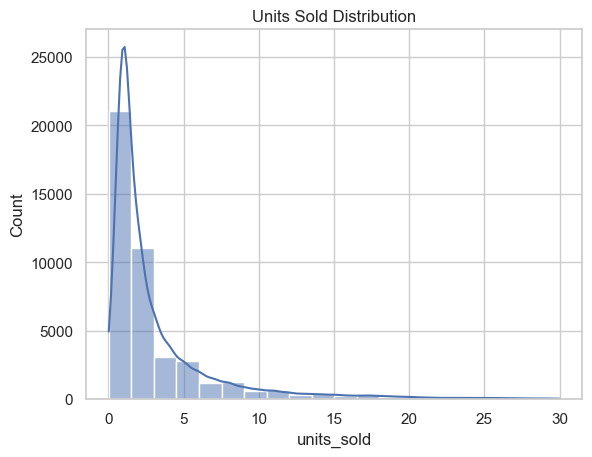

In [82]:
# re-do: check for outliers in units_sold

hist_4 = sns.histplot(df_clean['units_sold'], bins = 20, kde = True)
plt.title('Units Sold Distribution')
plt.show()

In [83]:
# export cleaned data set

df_clean.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'beer_clean_final.pkl'))